In [1]:
# get all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#ML required libraries

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import Ridge


<h2> Predicting the price of a property with Linear Regression</h2>

In [2]:
ml_ready = pd.read_csv('C:/Users/GIGABYTE/Desktop/blog_post/ml_combined.csv')

In [3]:
pd.set_option('display.max_columns', 500)

In [4]:
ml_ready.shape

(3026, 60)

In [5]:
ml_ready.head()

,Unnamed: 0,bed_type,calendar_last_scraped,cancellation_policy,city,country,country_code,experiences_offered,has_availability,host_acceptance_rate,host_has_profile_pic,host_identity_verified,host_is_superhost,host_response_time,instant_bookable,is_location_exact,jurisdiction_names,last_scraped,market,neighbourhood_group_cleansed,property_type,require_guest_phone_verification,require_guest_profile_picture,requires_license,room_type,smart_location,state,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month,price,weekly_price,security_deposit,cleaning_fee,extra_people
0,0,Real Bed,2016-01-04,moderate,Seattle,United States,US,none,t,100%,t,t,f,within a few hours,f,t,WASHINGTON,2016-01-04,Seattle,Queen Anne,Apartment,f,f,f,Entire home/apt,"Seattle, WA",WA,241032,20160104002432,956883,3.0,3.0,47.636289,-122.371025,4,1.0,1.0,1.0,2,1,365,14,41,71,346,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,2,4.07,85.0,567.557366,254.484832,61.710904,5.0
1,1,Real Bed,2016-01-04,strict,Seattle,United States,US,none,t,100%,t,t,t,within an hour,f,t,WASHINGTON,2016-01-04,Seattle,Queen Anne,Apartment,t,t,f,Entire home/apt,"Seattle, WA",WA,953595,20160104002432,5177328,6.0,6.0,47.639123,-122.365666,4,1.0,1.0,1.0,1,2,90,13,13,16,291,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0,6,1.48,150.0,567.557366,100.000000,40.000000,0.0
2,2,Real Bed,2016-01-04,strict,Seattle,United States,US,none,t,100%,t,t,f,within a few hours,f,t,WASHINGTON,2016-01-04,Seattle,Queen Anne,House,f,f,f,Entire home/apt,"Seattle, WA",WA,3308979,20160104002432,16708587,2.0,2.0,47.629724,-122.369483,11,4.5,5.0,7.0,10,4,30,1,6,17,220,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0,2,1.15,975.0,567.557366,254.484832,300.000000,25.0
3,6,Real Bed,2016-01-04,moderate,Seattle,United States,US,none,t,100%,t,t,t,within an hour,f,t,WASHINGTON,2016-01-04,Seattle,Queen Anne,House,f,f,f,Private room,"Seattle, WA",WA,1909058,20160104002432,2497928,1.0,1.0,47.636605,-122.368519,2,1.0,1.0,1.0,1,3,14,20,49,71,346,58,99.0,10.0,10.0,10.0,10.0,10.0,10.0,1,2.46,80.0,575.000000,150.000000,61.710904,10.0
4,7,Real Bed,2016-01-04,strict,Seattle,United States,US,none,t,100%,t,t,t,within an hour,f,t,WASHINGTON,2016-01-04,Seattle,Queen Anne,Cabin,t,t,f,Private room,"Seattle, WA",WA,856550,20160104002432,4016632,5.0,5.0,47.640161,-122.375856,2,1.0,1.0,1.0,1,2,7,22,42,42,100,173,97.0,10.0,10.0,10.0,10.0,9.0,10.0,5,4.73,60.0,360.000000,150.000000,25.000000,0.0


<b> Functions to clean the categorical data</b>

In [6]:
def col_to_drop(df):
    #Function to drop cols that dont add value to the ML algo
    drop_list = ['Unnamed: 0', 'smart_location', 'id', 'host_id','city', 'latitude', 'longitude' ]
    df.drop(drop_list, axis=1, inplace=True)
    
    return df

In [7]:
def drop_no_variance_col(df):
    #function to drop cols that have one unique element and returns the df with the specified col
    one_var = []
    #the for loop to search for col that have one elemenet only
    for col in df.columns:
        uniq = len(df[col].unique())
        if uniq < 2:
            one_var.append(col)
            
    df.drop(one_var, axis=1, inplace=True)
    #print(one_var)
    
    return df

In [8]:
ml_testing = col_to_drop(ml_ready)

In [9]:
ml_testing_1 = drop_no_variance_col(ml_testing)

In [10]:
ml_testing_1.shape

(3026, 42)

In [11]:
ml_testing_1.head()

,bed_type,cancellation_policy,host_acceptance_rate,host_has_profile_pic,host_identity_verified,host_is_superhost,host_response_time,instant_bookable,is_location_exact,neighbourhood_group_cleansed,property_type,require_guest_phone_verification,require_guest_profile_picture,room_type,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month,price,weekly_price,security_deposit,cleaning_fee,extra_people
0,Real Bed,moderate,100%,t,t,f,within a few hours,f,t,Queen Anne,Apartment,f,f,Entire home/apt,3.0,3.0,4,1.0,1.0,1.0,2,1,365,14,41,71,346,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,2,4.07,85.0,567.557366,254.484832,61.710904,5.0
1,Real Bed,strict,100%,t,t,t,within an hour,f,t,Queen Anne,Apartment,t,t,Entire home/apt,6.0,6.0,4,1.0,1.0,1.0,1,2,90,13,13,16,291,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0,6,1.48,150.0,567.557366,100.000000,40.000000,0.0
2,Real Bed,strict,100%,t,t,f,within a few hours,f,t,Queen Anne,House,f,f,Entire home/apt,2.0,2.0,11,4.5,5.0,7.0,10,4,30,1,6,17,220,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0,2,1.15,975.0,567.557366,254.484832,300.000000,25.0
3,Real Bed,moderate,100%,t,t,t,within an hour,f,t,Queen Anne,House,f,f,Private room,1.0,1.0,2,1.0,1.0,1.0,1,3,14,20,49,71,346,58,99.0,10.0,10.0,10.0,10.0,10.0,10.0,1,2.46,80.0,575.000000,150.000000,61.710904,10.0
4,Real Bed,strict,100%,t,t,t,within an hour,f,t,Queen Anne,Cabin,t,t,Private room,5.0,5.0,2,1.0,1.0,1.0,1,2,7,22,42,42,100,173,97.0,10.0,10.0,10.0,10.0,9.0,10.0,5,4.73,60.0,360.000000,150.000000,25.000000,0.0


In [12]:
def get_cat_col_name(df):
    #function returns list of catigorical list of col
    cat_ready = df.select_dtypes(include='object').columns
    return cat_ready

In [13]:
cat_ready = get_cat_col_name(ml_testing_1)

In [14]:
len(cat_ready)

14

In [15]:
cat_ready

Index(['bed_type', 'cancellation_policy', 'host_acceptance_rate',
       'host_has_profile_pic', 'host_identity_verified', 'host_is_superhost',
       'host_response_time', 'instant_bookable', 'is_location_exact',
       'neighbourhood_group_cleansed', 'property_type',
       'require_guest_phone_verification', 'require_guest_profile_picture',
       'room_type'],
      dtype='object')

In [16]:
ml_testing_1.shape

(3026, 42)

In [17]:
ml_testing_1[cat_ready].shape

(3026, 14)

<b> Function to encode categorical Variables</b>

In [18]:
def complie_cat(df, drop_first_t_f):
    """function takes in a categorical df then seperates df and returns a new df all categorical only"""
    
    for col in df:
        dum = pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=drop_first_t_f)
        df[dum.columns] = dum
        #drop the original columns
        df.drop(col, axis=1, inplace=True)
    return df
    
    

In [19]:
cat_df = complie_cat(ml_testing_1[cat_ready], drop_first_t_f=True)

C:\Users\GIGABYTE\Anaconda3\lib\site-packages\pandas\core\frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]
C:\Users\GIGABYTE\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [20]:
cat_df.shape

(3026, 50)

In [21]:
cat_df.head()

,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_moderate,cancellation_policy_strict,host_acceptance_rate_100%,host_has_profile_pic_t,host_identity_verified_t,host_is_superhost_t,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,instant_bookable_t,is_location_exact_t,neighbourhood_group_cleansed_Beacon Hill,neighbourhood_group_cleansed_Capitol Hill,neighbourhood_group_cleansed_Cascade,neighbourhood_group_cleansed_Central Area,neighbourhood_group_cleansed_Delridge,neighbourhood_group_cleansed_Downtown,neighbourhood_group_cleansed_Interbay,neighbourhood_group_cleansed_Lake City,neighbourhood_group_cleansed_Magnolia,neighbourhood_group_cleansed_Northgate,neighbourhood_group_cleansed_Other neighborhoods,neighbourhood_group_cleansed_Queen Anne,neighbourhood_group_cleansed_Rainier Valley,neighbourhood_group_cleansed_Seward Park,neighbourhood_group_cleansed_University District,neighbourhood_group_cleansed_West Seattle,property_type_Bed & Breakfast,property_type_Boat,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Chalet,property_type_Condominium,property_type_Dorm,property_type_House,property_type_Loft,property_type_Other,property_type_Tent,property_type_Townhouse,property_type_Treehouse,property_type_Yurt,require_guest_phone_verification_t,require_guest_profile_picture_t,room_type_Private room,room_type_Shared room
0,0,0,0,1,1,0,1,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,1,1,1,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
2,0,0,0,1,0,1,1,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,1,0,1,1,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4,0,0,0,1,0,1,1,1,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0


<b> Function to concat the dataframes togther</b>

In [22]:
def concat_df(df1, df2):
    #df1 is for seperating the numirical col from the object
    #df2 is for the seperate catigoltical df
    num_df = df1.select_dtypes(exclude='object')
    
    #both df to be concated
    full_df = pd.concat([num_df, df2], axis=1)
    
    return full_df

In [23]:
full_ml = concat_df(ml_testing_1, cat_df)

In [24]:
full_ml.shape

(3026, 78)

In [25]:
full_ml.head()

,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month,price,weekly_price,security_deposit,cleaning_fee,extra_people,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_moderate,cancellation_policy_strict,host_acceptance_rate_100%,host_has_profile_pic_t,host_identity_verified_t,host_is_superhost_t,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,instant_bookable_t,is_location_exact_t,neighbourhood_group_cleansed_Beacon Hill,neighbourhood_group_cleansed_Capitol Hill,neighbourhood_group_cleansed_Cascade,neighbourhood_group_cleansed_Central Area,neighbourhood_group_cleansed_Delridge,neighbourhood_group_cleansed_Downtown,neighbourhood_group_cleansed_Interbay,neighbourhood_group_cleansed_Lake City,neighbourhood_group_cleansed_Magnolia,neighbourhood_group_cleansed_Northgate,neighbourhood_group_cleansed_Other neighborhoods,neighbourhood_group_cleansed_Queen Anne,neighbourhood_group_cleansed_Rainier Valley,neighbourhood_group_cleansed_Seward Park,neighbourhood_group_cleansed_University District,neighbourhood_group_cleansed_West Seattle,property_type_Bed & Breakfast,property_type_Boat,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Chalet,property_type_Condominium,property_type_Dorm,property_type_House,property_type_Loft,property_type_Other,property_type_Tent,property_type_Townhouse,property_type_Treehouse,property_type_Yurt,require_guest_phone_verification_t,require_guest_profile_picture_t,room_type_Private room,room_type_Shared room
0,3.0,3.0,4,1.0,1.0,1.0,2,1,365,14,41,71,346,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,2,4.07,85.0,567.557366,254.484832,61.710904,5.0,0,0,0,1,1,0,1,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,6.0,6.0,4,1.0,1.0,1.0,1,2,90,13,13,16,291,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0,6,1.48,150.0,567.557366,100.000000,40.000000,0.0,0,0,0,1,0,1,1,1,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
2,2.0,2.0,11,4.5,5.0,7.0,10,4,30,1,6,17,220,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0,2,1.15,975.0,567.557366,254.484832,300.000000,25.0,0,0,0,1,0,1,1,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,1.0,1.0,2,1.0,1.0,1.0,1,3,14,20,49,71,346,58,99.0,10.0,10.0,10.0,10.0,10.0,10.0,1,2.46,80.0,575.000000,150.000000,61.710904,10.0,0,0,0,1,1,0,1,1,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4,5.0,5.0,2,1.0,1.0,1.0,1,2,7,22,42,42,100,173,97.0,10.0,10.0,10.0,10.0,9.0,10.0,5,4.73,60.0,360.000000,150.000000,25.000000,0.0,0,0,0,1,0,1,1,1,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0


<b> Prepare the matrix for training, testing and model fitting</b>

In [26]:
y = full_ml['price']
X = full_ml.drop('price', axis=1)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [28]:
X_train.shape

(2118, 77)

In [29]:
X_train.head()

,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month,weekly_price,security_deposit,cleaning_fee,extra_people,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_moderate,cancellation_policy_strict,host_acceptance_rate_100%,host_has_profile_pic_t,host_identity_verified_t,host_is_superhost_t,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,instant_bookable_t,is_location_exact_t,neighbourhood_group_cleansed_Beacon Hill,neighbourhood_group_cleansed_Capitol Hill,neighbourhood_group_cleansed_Cascade,neighbourhood_group_cleansed_Central Area,neighbourhood_group_cleansed_Delridge,neighbourhood_group_cleansed_Downtown,neighbourhood_group_cleansed_Interbay,neighbourhood_group_cleansed_Lake City,neighbourhood_group_cleansed_Magnolia,neighbourhood_group_cleansed_Northgate,neighbourhood_group_cleansed_Other neighborhoods,neighbourhood_group_cleansed_Queen Anne,neighbourhood_group_cleansed_Rainier Valley,neighbourhood_group_cleansed_Seward Park,neighbourhood_group_cleansed_University District,neighbourhood_group_cleansed_West Seattle,property_type_Bed & Breakfast,property_type_Boat,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Chalet,property_type_Condominium,property_type_Dorm,property_type_House,property_type_Loft,property_type_Other,property_type_Tent,property_type_Townhouse,property_type_Treehouse,property_type_Yurt,require_guest_phone_verification_t,require_guest_profile_picture_t,room_type_Private room,room_type_Shared room
1010,48.0,48.0,4,1.0,2.0,2.0,4,2,1125,30,60,90,151,44,95.0,10.0,10.0,10.0,10.0,10.0,9.0,3,3.40,567.557366,500.000000,80.0,20.0,0,0,0,1,0,1,1,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
1551,1.0,1.0,2,1.0,1.0,1.0,1,1,1125,28,55,85,351,3,93.0,10.0,10.0,10.0,10.0,9.0,10.0,1,3.00,580.000000,254.484832,21.0,0.0,0,0,0,1,1,0,1,1,1,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
952,2.0,2.0,1,1.0,1.0,1.0,1,1,1125,0,3,33,308,6,80.0,9.0,9.0,10.0,9.0,10.0,8.0,1,0.78,567.557366,254.484832,10.0,0.0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1713,2.0,2.0,5,1.0,2.0,2.0,2,2,1125,0,4,6,78,15,99.0,10.0,10.0,10.0,10.0,10.0,10.0,2,2.26,850.000000,254.484832,85.0,15.0,0,0,0,1,1,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2918,2.0,2.0,1,1.0,1.0,1.0,1,1,1125,30,60,90,365,69,91.0,9.0,10.0,10.0,10.0,10.0,9.0,2,2.42,567.557366,254.484832,10.0,0.0,0,0,0,1,0,0,1,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0


In [30]:
lm_reg = LinearRegression(normalize=True)

In [31]:
lm_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [32]:
y_pred = lm_reg.predict(X_test)

In [33]:
mean_squared_error(y_test, y_pred)

2776.7234629081863

In [34]:
r2_score(y_test, y_pred)

0.63557191476115582

In [60]:
len(lm_reg.coef_)

77

<b>Create DataFrame for the coefficients</b>

In [98]:
coe_df2 = pd.DataFrame()

coe_df2['Names'] = X_test.columns
coe_df2['Coeff'] = lm_reg.coef_
coe_df2['abs_coeff'] = abs(lm_reg.coef_)




In [102]:
coe_df2.sort_values(by='abs_coeff', ascending=False).head(10)

,Names,Coeff,abs_coeff
65,property_type_Dorm,-177.161376,177.161376
34,host_has_profile_pic_t,-124.453200,124.453200
76,room_type_Shared room,-60.298360,60.298360
33,host_acceptance_rate_100%,-54.537651,54.537651
75,room_type_Private room,-30.186215,30.186215
47,neighbourhood_group_cleansed_Downtown,26.694975,26.694975
51,neighbourhood_group_cleansed_Northgate,-26.300643,26.300643
63,property_type_Chalet,25.749529,25.749529
46,neighbourhood_group_cleansed_Delridge,-25.620271,25.620271
67,property_type_Loft,24.418673,24.418673


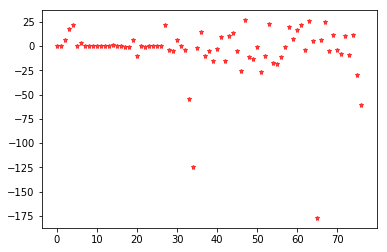

In [97]:
plt.plot(lm_reg.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7)

Also tried Ridge regression to see if coefficients change or minimized

In [76]:
rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [77]:
rr100= Ridge(alpha=100)
rr100.fit(X_train, y_train)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [78]:
rr.score(X_train, y_train)

0.6455360432106438

In [79]:
rr100.score(X_train, y_train)

0.6255785646764073

In [80]:
rr.score(X_test, y_test)

0.6356224009439579

In [81]:
rr100.score(X_test, y_test)

0.5539610345326214

In [83]:
len(rr.coef_)

77

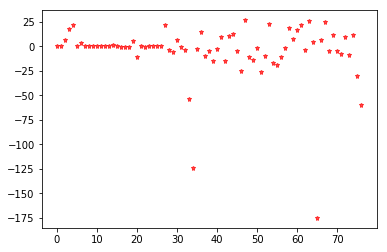

In [84]:
plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7)

In [85]:
rr_ridge = pd.DataFrame()
rr_ridge['name'] = X_test.columns
rr_ridge['coe'] = rr.coef_
rr_ridge['abs_coe'] = abs(rr.coef_)

In [104]:
rr_ridge.sort_values(by='abs_coe', ascending=False).head(10)

,name,coe,abs_coe
4,bedrooms,18.048383,18.048383
75,room_type_Private room,-17.211919,17.211919
76,room_type_Shared room,-16.899698,16.899698
47,neighbourhood_group_cleansed_Downtown,16.652258,16.652258
53,neighbourhood_group_cleansed_Queen Anne,13.505663,13.505663
3,bathrooms,13.410725,13.410725
36,host_is_superhost_t,10.717081,10.717081
20,review_scores_value,-10.053631,10.053631
2,accommodates,8.691051,8.691051
19,review_scores_location,8.001197,8.001197


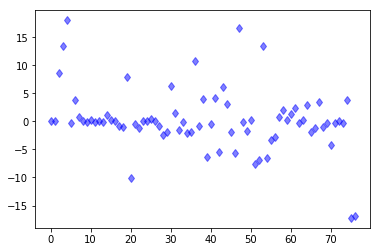

In [92]:
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$')

In [93]:
rr_ridge = pd.DataFrame()
rr_ridge['name'] = X_test.columns
rr_ridge['coe'] = rr100.coef_
rr_ridge['abs_coe'] = abs(rr100.coef_)

In [95]:
rr_ridge.sort_values(by='abs_coe', ascending=False)

,name,coe,abs_coe
4,bedrooms,18.048383,18.048383
75,room_type_Private room,-17.211919,17.211919
76,room_type_Shared room,-16.899698,16.899698
47,neighbourhood_group_cleansed_Downtown,16.652258,16.652258
53,neighbourhood_group_cleansed_Queen Anne,13.505663,13.505663
3,bathrooms,13.410725,13.410725
36,host_is_superhost_t,10.717081,10.717081
20,review_scores_value,-10.053631,10.053631
2,accommodates,8.691051,8.691051
19,review_scores_location,8.001197,8.001197
